<a href="https://colab.research.google.com/github/mrigankoml/MLAP_Term-IV/blob/main/Group%206_Assignment%20II/Joke_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing as pp
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [ ]:
#load files
train = pd.read_csv('/content/drive/MyDrive/Joke data/train.csv')
jokes = pd.read_csv('/content/drive/MyDrive/Joke data/jokes.csv')
test  = pd.read_csv('/content/drive/MyDrive/Joke data/test.csv')
sample_sub = pd.read_csv('/content/drive/MyDrive/Joke data/sample_submission.csv')

In [ ]:
train

,id,user_id,joke_id,Rating
0,31030_110,31030,110,2.750
1,16144_109,16144,109,5.094
2,23098_6,23098,6,-6.438
3,14273_86,14273,86,4.406
4,18419_134,18419,134,9.375
...,...,...,...,...
1092054,9517_132,9517,132,3.156
1092055,27767_118,27767,118,-1.594
1092056,10580_81,10580,81,2.000
1092057,31007_119,31007,119,8.906


In [ ]:
jokes

,joke_id,joke_text
0,1,Q. What's O. J. Simpson's web address? A. Slas...
1,2,How many feminists does it take to screw in a ...
2,3,Q. Did you hear about the dyslexic devil worsh...
3,4,They asked the Japanese visitor if they have e...
4,5,Q: What did the blind person say when given so...
...,...,...
134,135,"A blonde, brunette, and a red head are all lin..."
135,136,America: 8:00 - Welcome to work! 12:00 - Lunch...
136,137,It was the day of the big sale. Rumors of the ...
137,138,"Recently a teacher, a garbage collector, and a..."


In [ ]:
test

,id,user_id,joke_id
0,6194_11,6194,11
1,19356_3,19356,3
2,23426_79,23426,79
3,40030_3,40030,3
4,19806_115,19806,115
...,...,...,...
537875,14333_74,14333,74
537876,25245_16,25245,16
537877,4082_9,4082,9
537878,19638_128,19638,128


In [ ]:
sample_sub

,id,Rating
0,6194_11,0
1,19356_3,0
2,23426_79,0
3,40030_3,0
4,19806_115,0
...,...,...
537875,14333_74,0
537876,25245_16,0
537877,4082_9,0
537878,19638_128,0


In [ ]:
#merge datasets
data_train = train.merge(jokes, on='joke_id', how= 'left')
data_train

,id,user_id,joke_id,Rating,joke_text
0,31030_110,31030,110,2.750,"Judy was having trouble with her computer, so ..."
1,16144_109,16144,109,5.094,One day the first grade teacher was reading th...
2,23098_6,23098,6,-6.438,Q. What is orange and sounds like a parrot? A....
3,14273_86,14273,86,4.406,Two attorneys went into a diner and ordered tw...
4,18419_134,18419,134,9.375,A man is driving in the country one evening wh...
...,...,...,...,...,...
1092054,9517_132,9517,132,3.156,"One day, three men went to a shrine to ask the..."
1092055,27767_118,27767,118,-1.594,"An American, a Scot and a Canadian were in a t..."
1092056,10580_81,10580,81,2.000,"A Panda walks into a bar, sits down at a table..."
1092057,31007_119,31007,119,8.906,A group of girlfriends is on vacation when the...


In [ ]:
#merge datasets
data_test = test.merge(jokes, on='joke_id', how='left')
data_test

,id,user_id,joke_id,joke_text
0,6194_11,6194,11,What's the difference between a used tire and ...
1,19356_3,19356,3,Q. Did you hear about the dyslexic devil worsh...
2,23426_79,23426,79,A radio conversation between a US naval ship a...
3,40030_3,40030,3,Q. Did you hear about the dyslexic devil worsh...
4,19806_115,19806,115,An American tourist goes into a restaurant in ...
...,...,...,...,...
537875,14333_74,14333,74,Q: What is the difference between mechanical e...
537876,25245_16,25245,16,A guy walks into a bar and sits down next to a...
537877,4082_9,4082,9,Q: If a person who speaks three languages is c...
537878,19638_128,19638,128,WASHINGTON (Reuters) - A tragic fire on Monday...


In [ ]:
#check for missing values
data_train.isnull().sum()
data_test.isnull().sum()

id           0
user_id      0
joke_id      0
joke_text    0
dtype: int64

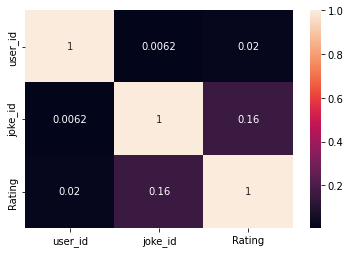

In [ ]:
#create a heatmap to correlate the ratings
plt.figure(figsize=(6,4))
cmap=train.corr()
sns.heatmap(cmap, annot=True)
#views and ratings have the highest correlation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


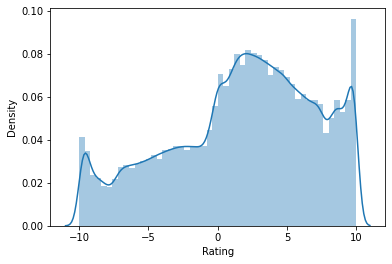

In [ ]:
#preprocess data
sns.distplot(train['Rating'])

In [ ]:
rating = data_train.groupby('Rating').sum().reset_index()
rating

,Rating,user_id,joke_id
0,-10.000,19531669,54093
1,-9.969,8805939,23803
2,-9.938,6070286,12925
3,-9.906,21552142,50933
4,-9.875,30661359,72639
...,...,...,...
636,9.875,79895523,268499
637,9.906,89203298,300784
638,9.938,95355307,331618
639,9.969,95481846,328309


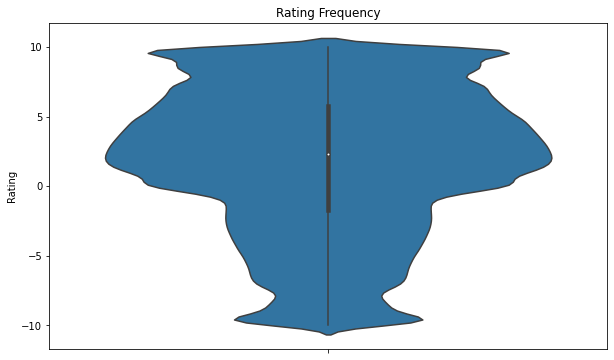

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Rating Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Rating"])
plt.show()

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')

stemmer = PorterStemmer()
words = stopwords.words("english")

data_train['processedtext'] = data_train['joke_text'].apply(lambda x: " ".join([stemmer.stem(i)
for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

data_test['processedtext'] = data_test['joke_text'].apply(lambda x: " ".join([stemmer.stem(i)
for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#make all words lower case
data_train['processedtext'] = data_train['processedtext'].str.lower()
data_test['processedtext'] = data_test['processedtext'].str.lower()

#remove words less than 1 character
data_train['processedtext'] = data_train['processedtext'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
data_test['processedtext'] = data_test['processedtext'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

In [ ]:
data_train

,id,user_id,joke_id,Rating,joke_text,processedtext
0,31030_110,31030,110,2.750,"Judy was having trouble with her computer, so ...",judi troubl comput call toni comput guy desk t...
1,16144_109,16144,109,5.094,One day the first grade teacher was reading th...,one day first grade teacher read stori three l...
2,23098_6,23098,6,-6.438,Q. What is orange and sounds like a parrot? A....,what orang sound like parrot carrot
3,14273_86,14273,86,4.406,Two attorneys went into a diner and ordered tw...,two attorney went diner order two drink then p...
4,18419_134,18419,134,9.375,A man is driving in the country one evening wh...,man drive countri one even car stall start he ...
...,...,...,...,...,...,...
1092054,9517_132,9517,132,3.156,"One day, three men went to a shrine to ask the...",one day three men went shrine ask father forgi...
1092055,27767_118,27767,118,-1.594,"An American, a Scot and a Canadian were in a t...",an american scot canadian terribl car accid th...
1092056,10580_81,10580,81,2.000,"A Panda walks into a bar, sits down at a table...",panda walk bar sit tabl order beer doubl chees...
1092057,31007_119,31007,119,8.906,A group of girlfriends is on vacation when the...,group girlfriend vacat see stori hotel sign re...


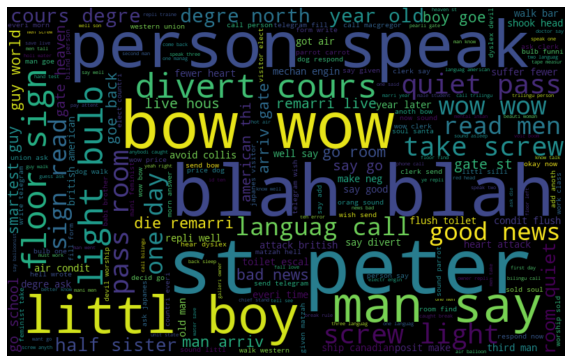

In [ ]:
joke_words = ' '.join([text for text in data_train['processedtext']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(joke_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
y = train['Rating']
X = data_train['processedtext']
X_test = data_test['processedtext']

In [ ]:
#break dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
X_train, X_val, y_train, y_val

(825493     teacher explain class differ languag use neg d...
 762807     how mani programm take chang lightbulb none th...
 1083154    washington reuter tragic fire monday destroy p...
 967483     if person speak three languag call trilingu pe...
 664067     how mani feminist take screw light bulb that f...
                                  ...                        
 110268     group manag given assign measur height flagpol...
 259178     dog walk western union ask clerk send telegram...
 131932                    what differ govern mafia one organ
 671155     guy walk bar order beer say bartend hey got gr...
 121958     czechoslovakian man felt eyesight grow steadil...
 Name: processedtext, Length: 982853, dtype: object,
 918721     what simpson web address slash slash backslash...
 938309     preist year old kid smartest guy world plane t...
 1056649    the pope die natur goe heaven he met recept co...
 880930     the graduat scienc degre ask whi work the grad...
 191068     two a

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
train_tfidf = vectorizer_tfidf.fit_transform(X_train.values.astype('U'))
val_tfidf = vectorizer_tfidf.transform(X_val.values.astype('U'))
X_test_tfidf = vectorizer_tfidf.transform(X_test.values.astype('U'))
print(vectorizer_tfidf.get_feature_names()[:10])

['abort', 'accid', 'accompani', 'account', 'accumul', 'acquit', 'actual', 'adam', 'add', 'address']


In [ ]:
train_tfidf.shape, val_tfidf.shape, X_test_tfidf.shape

((982853, 1523), (109206, 1523), (537880, 1523))

In [ ]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(max_iter=1000, tol=1e-3)
model.fit(train_tfidf, y_train)
print(model.score(train_tfidf,y_train))



0.09554845348572127


In [ ]:
y_pred = model.predict(val_tfidf)
y_train_pred = model.predict(train_tfidf)

In [ ]:
print("Train acc: ", r2_score(y_train, y_train_pred))
print(" Test acc: ", r2_score(y_val, y_pred))

Train acc:  0.09554845348572127
 Test acc:  0.09627204587900273


In [ ]:
print("Train acc: ", model.score(train_tfidf, y_train))
print("Test acc: ", model.score(val_tfidf, y_val))

Train acc:  0.09554845348572127
Test acc:  0.09627204587900275


In [ ]:
df = pd.DataFrame({'Actual': y_val, 'Predicted':y_pred})
df

,Actual,Predicted
918721,-0.438,-0.730079
938309,-1.750,2.779059
1056649,-9.031,2.952499
880930,-1.562,2.732150
191068,1.531,2.334682
...,...,...
845315,-1.000,3.059297
584406,-7.281,1.530973
541943,6.562,2.822656
616586,1.875,3.311474


In [ ]:
final_labels = model.predict(X_test_tfidf)
final_labels

array([ 2.98427284, -0.70374024,  3.60062476, ...,  0.6625795 ,
        2.76267657,  2.8894803 ])

In [ ]:
final_result = pd.DataFrame({'id': test['id'], 'Rating': final_labels})

In [ ]:
final_result.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
#upload submission
submission = pd.read_csv('submission.csv')
submission

,id,Rating
0,6194_11,2.984273
1,19356_3,-0.703740
2,23426_79,3.600625
3,40030_3,-0.703740
4,19806_115,2.767955
...,...,...
537875,14333_74,2.087382
537876,25245_16,2.458048
537877,4082_9,0.662580
537878,19638_128,2.762677


# New Section